In [26]:
import numpy as np
from math import exp
import networkx as nx
from matplotlib import pyplot as plt

Here we try to generate the network:

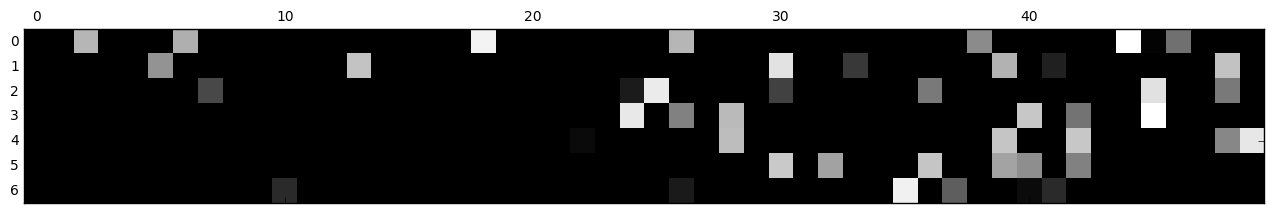

In [45]:
NCommunities = 7
NNodes = 50

#Average community size
A = 7
epsilon = 0.05

#Node-Community Affilation matrix
NC = np.asarray([[0. for i in range(NNodes)] for j in range(NCommunities)])
for community in range(NCommunities):
    community_size = np.random.randint(A-2,A+3)
    for i in range(community_size):
        member = np.random.randint(0,NNodes)
        NC[community,member] = 1

#Weight matrix F
for i in range(NCommunities):
    for j in range(NNodes):
        if NC[i,j] != 0:
            NC[i,j] = 3*np.random.rand()
            
plt.matshow(NC, fignum=100, cmap=plt.cm.gray)
plt.show()

#Node-Node affilation matrix
NN = np.asarray([[0 for i in range(NNodes)] for j in range(NNodes)])
for i in range(NNodes):
    for j in range(NNodes):
        if i != j:
            F = sum([NC[k,i]*NC[k,j] for k in range(NCommunities)])
            measure = np.random.rand()
            if measure < 1. - exp(-F) or measure < epsilon:
                NN[i,j] = 1
                NN[j,i] = 1        
            

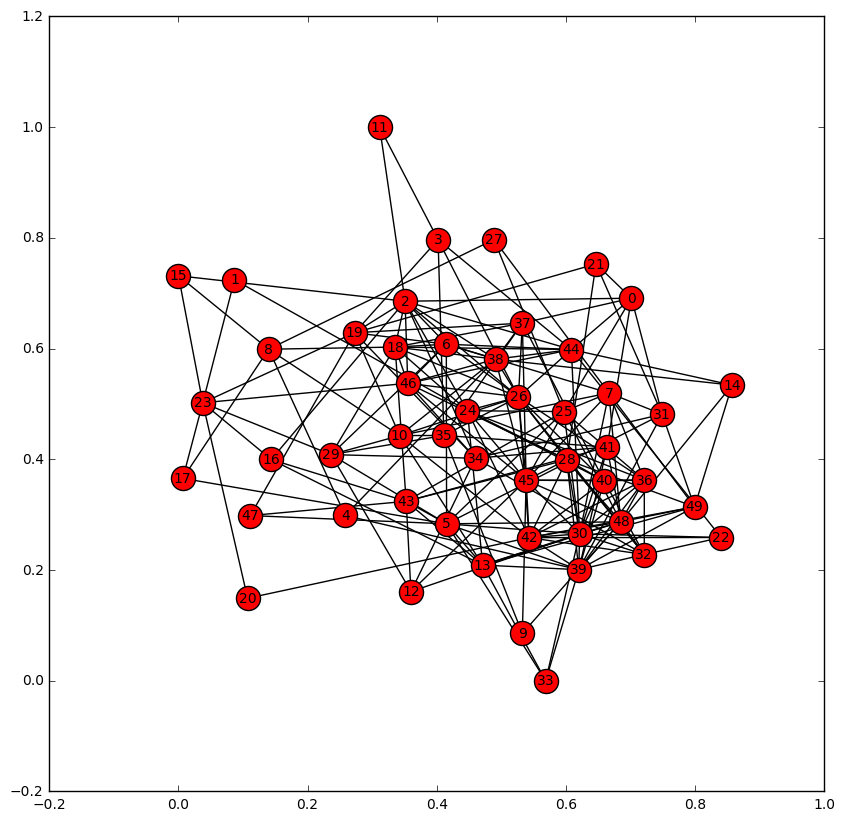

In [46]:
G = nx.from_numpy_matrix(np.matrix(NN))
pos = nx.spring_layout(G)
labels = {}
for i in xrange(NNodes):
    labels[i] = i
    
plt.figure(figsize = (10,10))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color = "r")
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, G.edges())
plt.show()